## Load the data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:
sales_df = pd.read_csv("../data/cleaned/cafe_sales_cleaned.csv",)

In [27]:
sales_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month,Day Of The Week
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,June,Sunday


In [28]:
sales_df["Transaction Date"] = pd.to_datetime(sales_df["Transaction Date"])

In [29]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9520 non-null   object        
 2   Quantity          9977 non-null   float64       
 3   Price Per Unit    9994 non-null   float64       
 4   Total Spent       9977 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
 8   Month             9540 non-null   object        
 9   Day Of The Week   9540 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 781.4+ KB


### Now that the data is cleaned, we can start the analysis!!

# Exploratory Data Analysis 📊

1. Getting a quick summary of all the key statistics in a dataset using the `.describe()` method

In [30]:
sales_df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9977.000000,9994.000000,9977.000000,9540
mean,3.024957,2.947018,8.930139,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.420395,1.280006,6.004921,NaN


## Popular Selling Times 💹

- Let's find the most selling product in term of quantity


In [31]:
sales_df.groupby("Item")["Quantity"].sum().sort_values(ascending = False)

#Sandwich is the most selling product by quantity

Item
Coffee      3904.0
Salad       3819.0
Tea         3650.0
Cookie      3598.0
Juice       3505.0
Cake        3468.0
Sandwich    3429.0
Smoothie    3336.0
Name: Quantity, dtype: float64

- Now the most selling product by revenue. 


In [32]:
sales_df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
#Salad is the most selling product by revenue

Item
Salad       19095.0
Sandwich    13716.0
Smoothie    13344.0
Juice       10515.0
Cake        10404.0
Coffee       7808.0
Tea          5475.0
Cookie       3598.0
Name: Total Spent, dtype: float64

<Axes: xlabel='Item'>

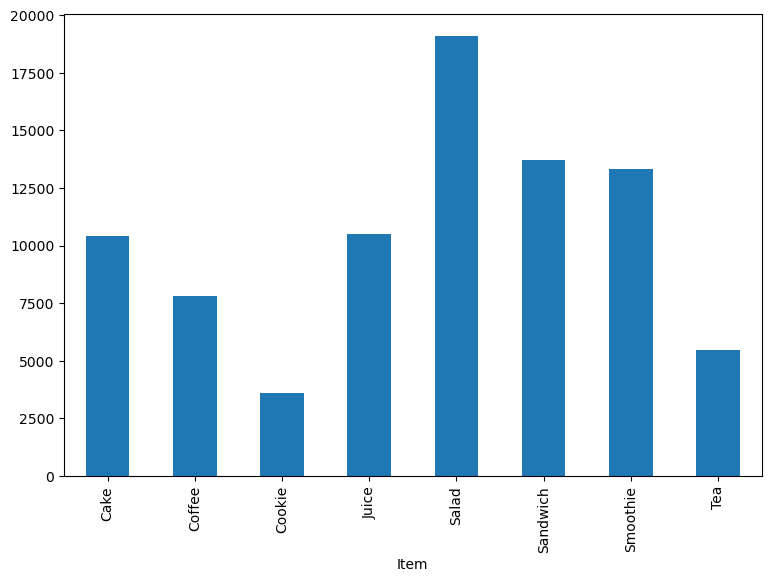

In [50]:
sales_df.groupby('Item')['Total Spent'].sum().plot(kind="bar",figsize=(9,6))


- Next, let's identify peak months and peak days of the week

In [33]:
sales_df.groupby("Month")["Total Spent"].sum().sort_values(ascending=0)

#June is most selling month.

Month
June         7353.0
October      7314.0
January      7254.0
March        7216.0
April        7179.0
December     7177.0
August       7112.5
November     6967.0
May          6957.5
July         6877.5
September    6871.0
February     6644.0
Name: Total Spent, dtype: float64

- Let's see the sales trend over the year 📈

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_45919/1589077112.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_df.groupby("Month")["Total Spent"].sum().plot(kind="line",figsize=(12,7),)


Text(0.5, 0, 'Months')

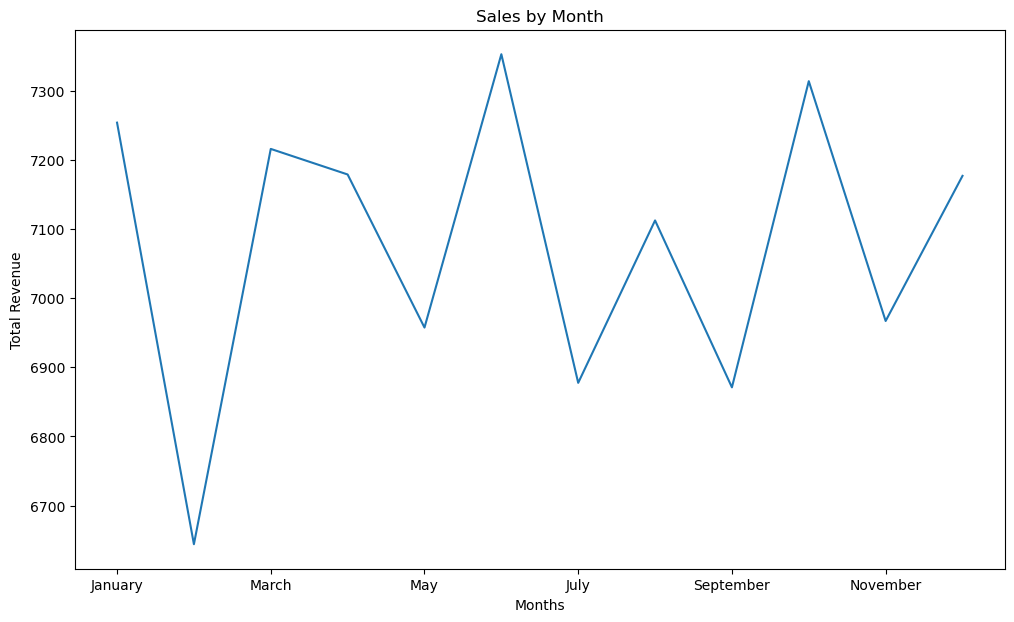

In [40]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sales_df["Month"] = pd.Categorical(sales_df["Month"], categories=month_order, ordered=False,)
sales_df.groupby("Month")["Total Spent"].sum().plot(kind="line",figsize=(12,7),)
plt.title('Sales by Month')
plt.ylabel('Total Revenue')
plt.xlabel('Months')

In [41]:
sales_df.groupby("Day Of The Week")["Total Spent"].sum().sort_values(ascending = False)
#Thursday is the most selling day of the week with $12,401.5 in total sale.


Day Of The Week
Thursday     12401.5
Friday       12334.0
Sunday       12287.5
Monday       12140.0
Saturday     12039.5
Tuesday      12039.5
Wednesday    11680.5
Name: Total Spent, dtype: float64

- The average sales on the weekends is greater than weekdays sales 💵💵💵
- So weekends are busier than weekdays!! 

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_45919/3088471961.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_df.groupby("Day Of The Week")['Total Spent'].sum().plot(kind="line",figsize=(10,6),rot=45)


Text(0.5, 0, 'Day of Week')

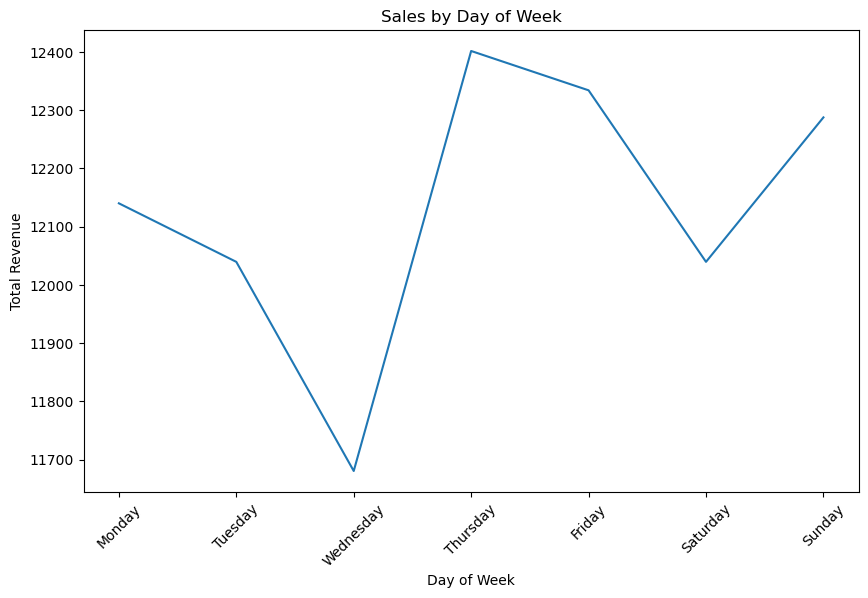

In [42]:
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_df["Day Of The Week"] = pd.Categorical(sales_df["Day Of The Week"], categories=correct_order, ordered=True)
sales_df.groupby("Day Of The Week")['Total Spent'].sum().plot(kind="line",figsize=(10,6),rot=45)
plt.title('Sales by Day of Week')
plt.ylabel('Total Revenue')
plt.xlabel('Day of Week')

#### Relationship between `Total Spent` and `Item`
- We can use a kernel density estimate (KDE) plot to visualition categorical variable. very useful to visualize the data specialy when multiple distributions are shown. 

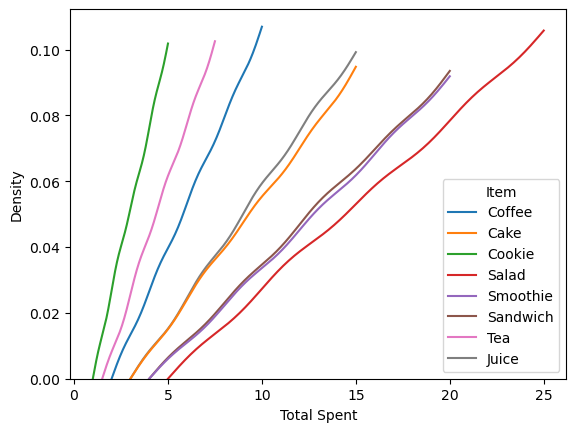

In [43]:
sns.kdeplot(data=sales_df, x="Total Spent", hue="Item", cut=0,cumulative=True)
plt.show()

- Seems like Salad is the only item that has $25 of Total Spent. 

### Now the relationship between `Total Spent` and `Payement Method`


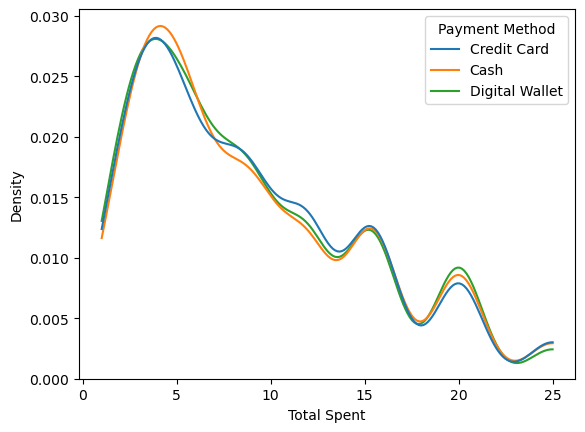

In [44]:
sns.kdeplot(data=sales_df, x="Total Spent", hue="Payment Method", cut=0,)
plt.show()

In [45]:
sales_df["Payment Method"].notna().value_counts()
#sales_df["Payment Method"].isna().sum()

Payment Method
True     6822
False    3178
Name: count, dtype: int64

Text(0.5, 0, 'Payement Mothod')

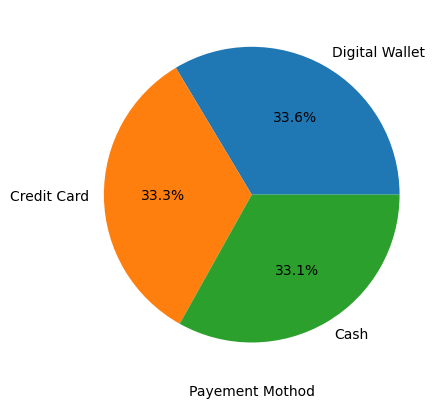

In [46]:
sales_df["Payment Method"].value_counts().plot(kind="pie",autopct='%1.1f%%',)
plt.ylabel('')
plt.xlabel("Payement Mothod")
